In [1]:
#ITO-2
L = 3/10**3
L_film = 150/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air1",
        "/home/meriff/Python_projects/ITO_measurment/sample1_air1"]

In [72]:
#ITO-2_another
L = 3/10**3
L_film = 150/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air2",
        "/home/meriff/Python_projects/ITO_measurment/sample1_air2"]

In [58]:
#ITO-3
L = 3/10**3
L_film = 110/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air4",
        "/home/meriff/Python_projects/ITO_measurment/sample3_air4"]

In [62]:
#ITO-3_another
L = 3/10**3
L_film = 110/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air3",
        "/home/meriff/Python_projects/ITO_measurment/sample3_air3"]

In [48]:
#ITO-4
L = 3/10**3
L_film = 200/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air4",
        "/home/meriff/Python_projects/ITO_measurment/sample4_air4"]

In [52]:
#ITO-4_another
L = 3/10**3
L_film = 200/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air3",
        "/home/meriff/Python_projects/ITO_measurment/sample4_air3"]

In [1]:
#ITO-5
L = 3/10**3
L_film = 274/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air5",
        "/home/meriff/Python_projects/ITO_measurment/Sample5_air5"]

In [42]:
#ITO-5_another
L = 3/10**3
L_film = 274/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air6",
        "/home/meriff/Python_projects/ITO_measurment/sample5_air6"]

In [25]:
#ITO-6
L = 3/10**3
L_film = 460/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air5",
        "/home/meriff/Python_projects/ITO_measurment/sample6_air5"]

In [29]:
#ITO-6_another
L = 3/10**3
L_film = 460/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air6",
        "/home/meriff/Python_projects/ITO_measurment/sample6_air6"]

In [14]:
#ITO-7
L = 3/10**3
L_film = 76/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air7",
        "/home/meriff/Python_projects/ITO_measurment/sample7_air7"]

In [19]:
#ITO-7_another
L = 3/10**3
L_film = 76/10**9
f_name = ["/home/meriff/Python_projects/ITO_measurment/air8",
        "/home/meriff/Python_projects/ITO_measurment/sample7_air8"]

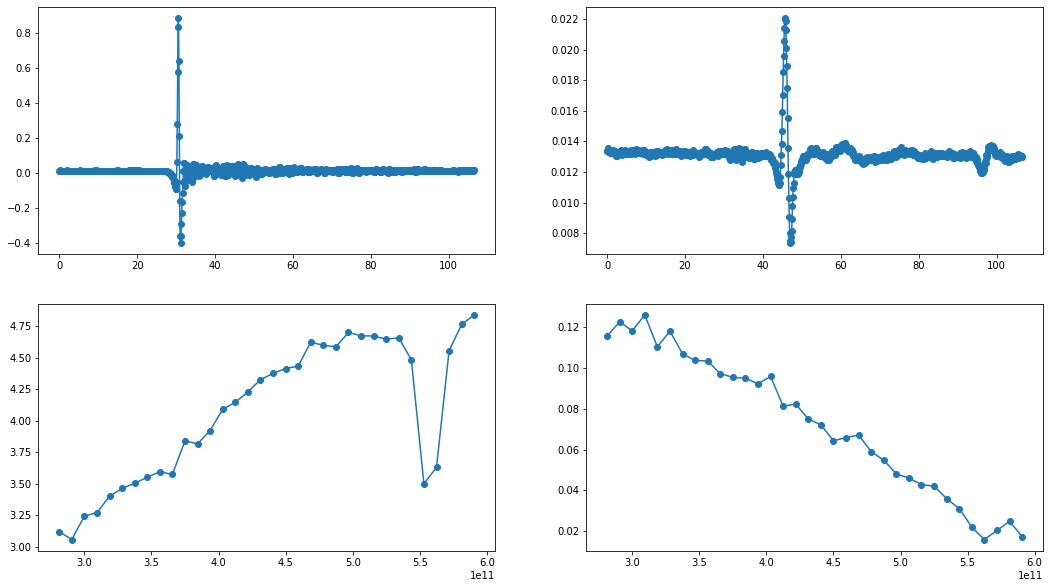

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
from IPython.display import clear_output
from scipy.signal import butter
from scipy.signal import sosfilt

Long = 1024
border_start = 30
border_stop = 64

def read_info(f_name):
    handle = open(f_name, "r")
    data = []
    for line in handle:
        data.append([float(x) for x in line.split()])
    handle.close()
    timer_f=[]; signal_f=[]; N=len(data)
    for i in range (0,Long):
        timer_f.append(data[i][0])
        signal_f.append(data[i][1])
    dT = timer_f[1]-timer_f[0]
    #for i in range (N,Long):
    #    timer_f.append(i*dT+dT)
    #    signal_f.append(0)
    return timer_f, signal_f,N

def read_sub(f_name):
    handle = open(f_name, "r")
    data = []
    for line in handle:
        data.append([float(x) for x in line.split()])
    handle.close()
    N=len(data)
    k_sub=[]; n_sub=[]
    for i in range (0,border_stop):
        k_sub.append(data[i][1])
        n_sub.append(data[i][2])
    return k_sub, n_sub

k_sub,n_sub = read_sub('/home/meriff/Python_projects/ITO_measurment/refr_sub_1024')

timer=np.zeros(Long)
signal=np.zeros((2,Long))
length_s=np.zeros(2)

for i in range (0,2):
    timer,signal[i],N = read_info(f_name[i])
    length_s[i] = N

dT = (timer[1] - timer[0])/10**12
frequency = np.fft.fftfreq(Long, dT)

signal_w=np.fft.fft(signal,axis=1)            #here fft is done
plt.rcParams['figure.figsize'] = [18,10]
fig,a=plt.subplots(2, 2)

for i in range(0,2):
    N=Long#int(length_s[i])
    #print('Time sample length', N)
    a[0][i].plot(timer[0:N], signal[i,0:N], 'o-')
    a[1][i].plot(frequency[border_start:border_stop],np.abs(signal_w[i,border_start:border_stop]),'o-')

plt.show()

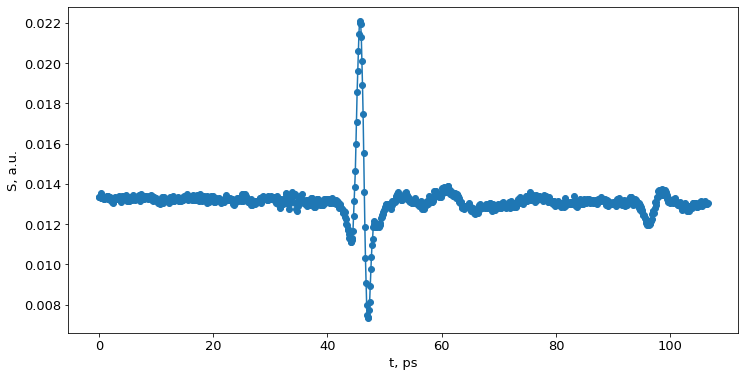

In [18]:
plt.rcParams['figure.figsize'] = [12,6]
fig,a=plt.subplots()
a.plot(timer[0:Long], signal[1,0:Long], 'o-')
a.set_xlabel('t, ps')
a.set_ylabel('S, a.u.')
plt.show()

Text(0.5, 0, 'u, Hz')

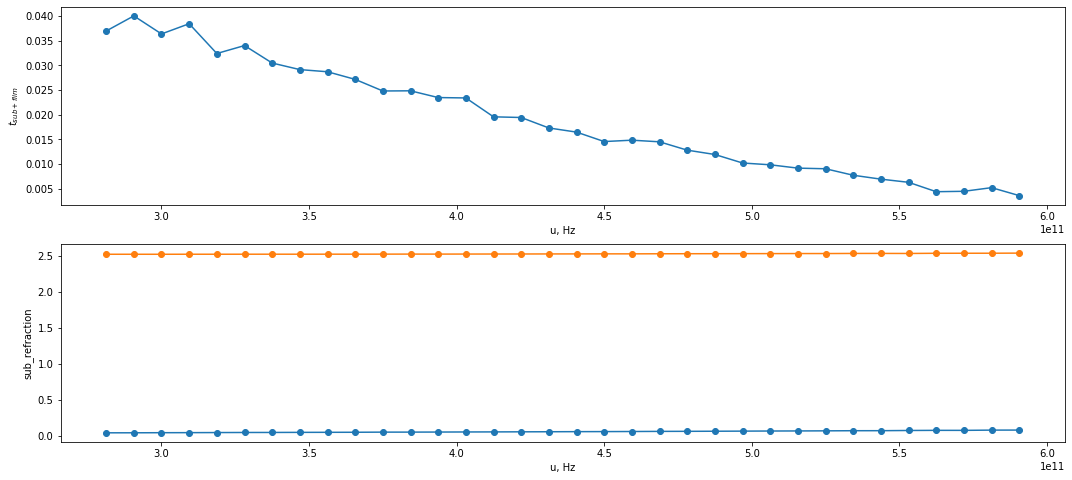

In [3]:
plt.rcParams['figure.figsize'] = [18,8]
titles = ["$t_{sub}$",
         "$t_{sub+flim}$"]
fig,a=plt.subplots(2)
a[0].plot(frequency[border_start:border_stop],abs(signal_w[1,border_start:border_stop]/signal_w[0,border_start:border_stop]),'o-')
a[0].set_ylabel(titles[1])
a[0].set_xlabel('u, Hz')
a[1].plot(frequency[border_start:border_stop],k_sub[border_start:border_stop],'o-')
a[1].plot(frequency[border_start:border_stop],n_sub[border_start:border_stop],'o-')
a[1].set_ylabel('sub_refraction')
a[1].set_xlabel('u, Hz')

Counted 100 %
1.524e-07


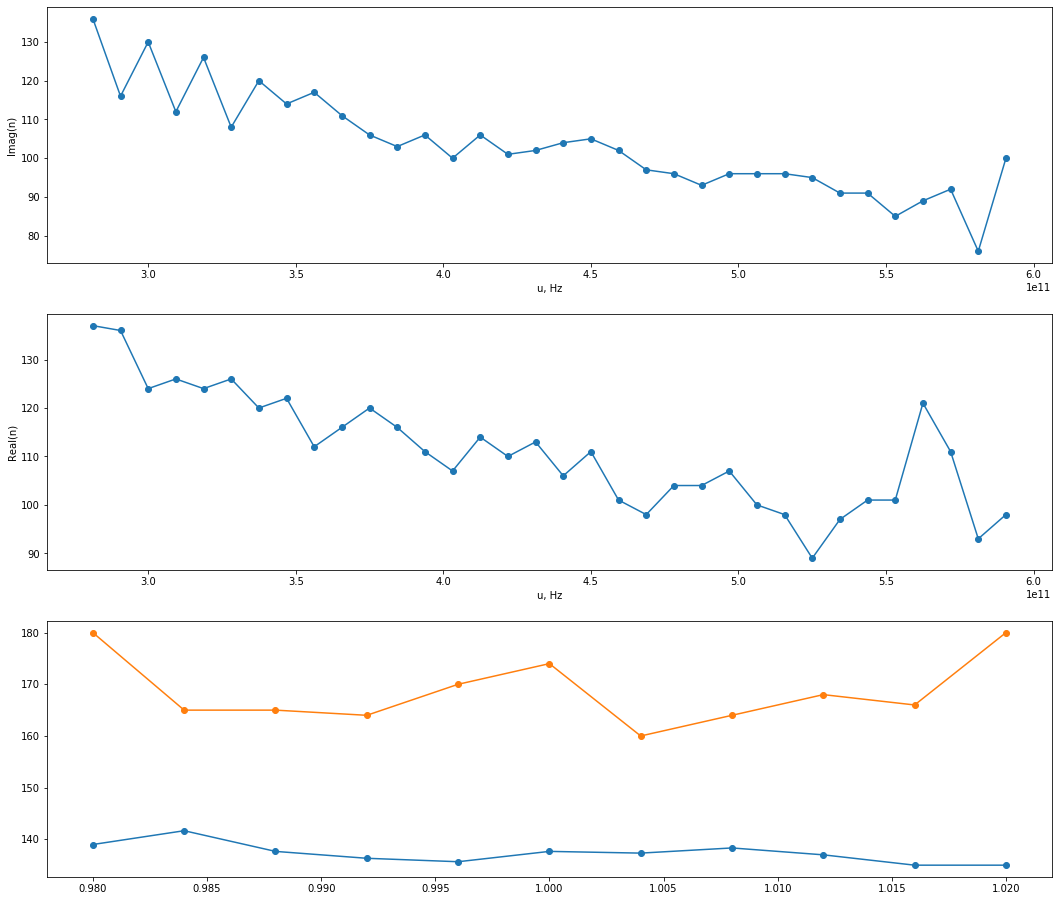

In [7]:
#ALGHORITM WITH L_FILM FITTING
ph=np.zeros(border_stop)
H = np.zeros(border_stop, dtype = complex)
n_simple=np.zeros(border_stop)
k_simple=np.zeros(border_stop)
deltas=np.zeros(border_stop)

for i in range (border_start,border_stop):
    H[i] = signal_w[1,i]/signal_w[0,i]
    ph[i] = cmath.phase(H[i])
ph=np.unwrap(ph)

w_c = np.zeros(border_stop)
for i in range (border_start,border_stop):
    w_c[i] = frequency[i]*2*math.pi/(3*10**8)

logic_stop = border_stop
TV_ar = []
TV_ar2 = []
dzeta_ar = np.arange(0.98,1.02,0.004)
TV_min = 100000

for dzeta in dzeta_ar:
    percent = (dzeta-0.98)/(1.02-0.98)*100
    clear_output(wait=True)
    print("Counted", int(percent),"%")  
    for i in range (border_start,logic_stop):
        n_s = n_sub[i] - 1.j * k_sub[i]
        K = 8*n_s/(n_s+1) * cmath.exp(1.j * w_c[i] * (L+L_film*dzeta-L*n_s))
        minim = 100  
        for n in range (40,150):
            for k in range (40,150):
                n_f = n - 1.j*k
                FP = 1/(1-(n_f-n_s)*(n_f-1)/(n_f+n_s)/(n_f+1)*cmath.exp(-2.j*w_c[i]*L_film*dzeta*n_f))
                delta = abs(H[i] - K*n_f*cmath.exp(-1.j*dzeta*L_film*n_f*w_c[i])/(n_f+1)/(n_f+n_s)*FP)
                if (delta < minim):
                    minim = delta
                    n_simple[i] = n
                    k_simple[i] = k
        deltas[i] = minim
    TV2=0; TV = 0
    for i in range (border_start,logic_stop-1):
        TV += abs(k_simple[i+1]-k_simple[i]) + abs(n_simple[i+1]-n_simple[i])
    for i in range (border_start,logic_stop-2):
        TV2 += abs(abs(k_simple[i+2]-k_simple[i+1]) + abs(n_simple[i+2]-n_simple[i+1]) - \
                   abs(k_simple[i+1]-k_simple[i]) - abs(n_simple[i+1]-n_simple[i]))
    TV_ar2.append(TV2)
    TV_ar.append(TV/3)
    if TV_min>TV:
        L_film_true = dzeta*L_film
        print(L_film_true)
        TV_min=TV
        n_opt=np.copy(n_simple)
        k_opt=np.copy(k_simple)
    
print(L_film_true)
plt.rcParams['figure.figsize'] = [18,16]
fig,a=plt.subplots(3)
a[0].plot(frequency[border_start:logic_stop], k_opt[border_start:logic_stop], 'o-')
a[0].set_ylabel('Imag(n)')
a[0].set_xlabel('u, Hz')
a[1].plot(frequency[border_start:logic_stop], n_opt[border_start:logic_stop], 'o-')
a[1].set_ylabel('Real(n)')
a[1].set_xlabel('u, Hz')
a[2].plot(dzeta_ar, TV_ar, 'o-')
a[2].plot(dzeta_ar, TV_ar2, 'o-')
plt.show()

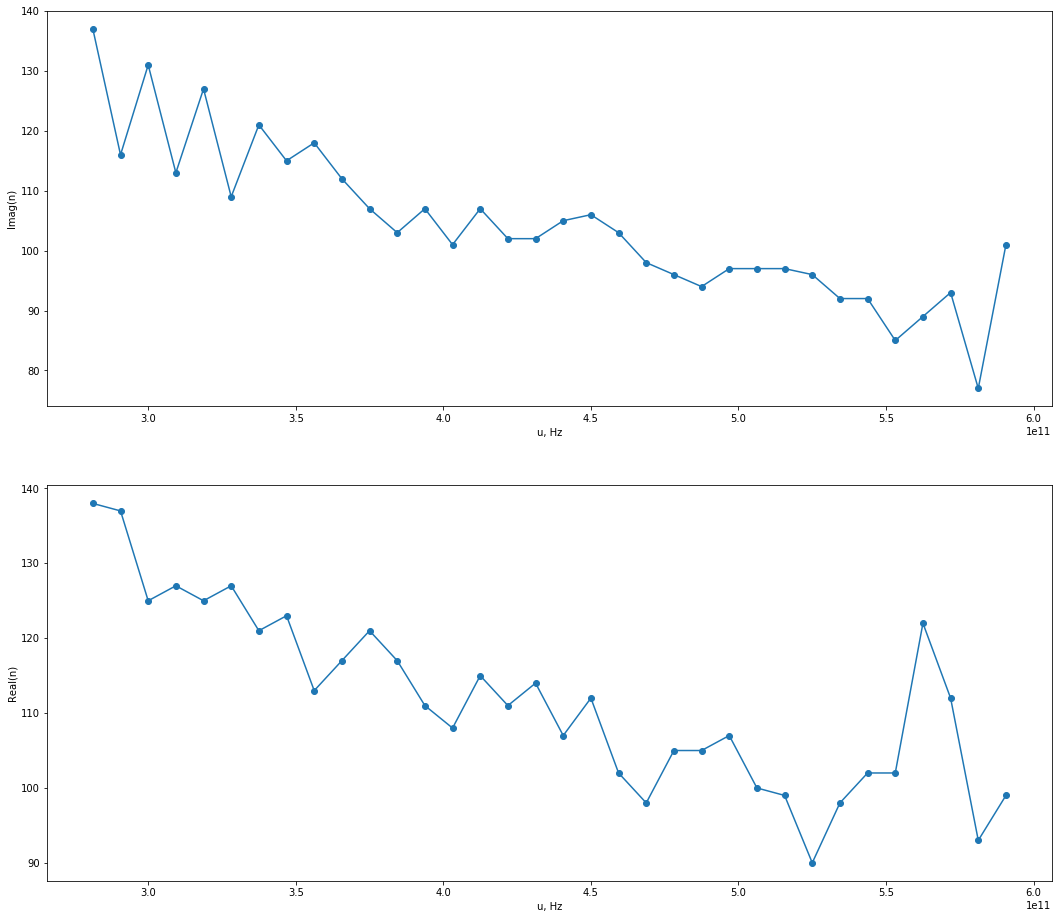

In [6]:
ph=np.zeros(border_stop)
H = np.zeros(border_stop, dtype = complex)
n_simple=np.zeros(border_stop)
k_simple=np.zeros(border_stop)
deltas=np.zeros(border_stop)

for i in range (border_start,border_stop):
    H[i] = signal_w[1,i]/signal_w[0,i]
    ph[i] = cmath.phase(H[i])
ph=np.unwrap(ph)

w_c = np.zeros(border_stop)
for i in range (border_start,border_stop):
    w_c[i] = frequency[i]*2*math.pi/(3*10**8)

logic_stop = border_stop
TV_ar = []
TV_ar2 = []
dzeta_ar = np.arange(0.98,1.02,0.004)
TV_min = 100000


for i in range (border_start,logic_stop):
    n_s = n_sub[i] - 1.j * k_sub[i]
    K = 8*n_s/(n_s+1) * cmath.exp(1.j * w_c[i] * (L+L_film-L*n_s))
    minim = 100  
    for n in range (40,150):
        for k in range (40,150):
            n_f = n - 1.j*k
            FP = 1/(1-(n_f-n_s)*(n_f-1)/(n_f+n_s)/(n_f+1)*cmath.exp(-2.j*w_c[i]*L_film*n_f))
            delta = abs(H[i] - K*n_f*cmath.exp(-1.j*L_film*n_f*w_c[i])/(n_f+1)/(n_f+n_s)*FP)
            if (delta < minim):
                minim = delta
                n_simple[i] = n
                k_simple[i] = k
    deltas[i] = minim
    
plt.rcParams['figure.figsize'] = [18,16]
fig,a=plt.subplots(2)
a[0].plot(frequency[border_start:logic_stop], k_simple[border_start:logic_stop], 'o-')
a[0].set_ylabel('Imag(n)')
a[0].set_xlabel('u, Hz')
a[1].plot(frequency[border_start:logic_stop], n_simple[border_start:logic_stop], 'o-')
a[1].set_ylabel('Real(n)')
a[1].set_xlabel('u, Hz')
plt.show()

In [75]:
k_opt2 = np.copy(k_simple)
n_opt2 = np.copy(n_simple)

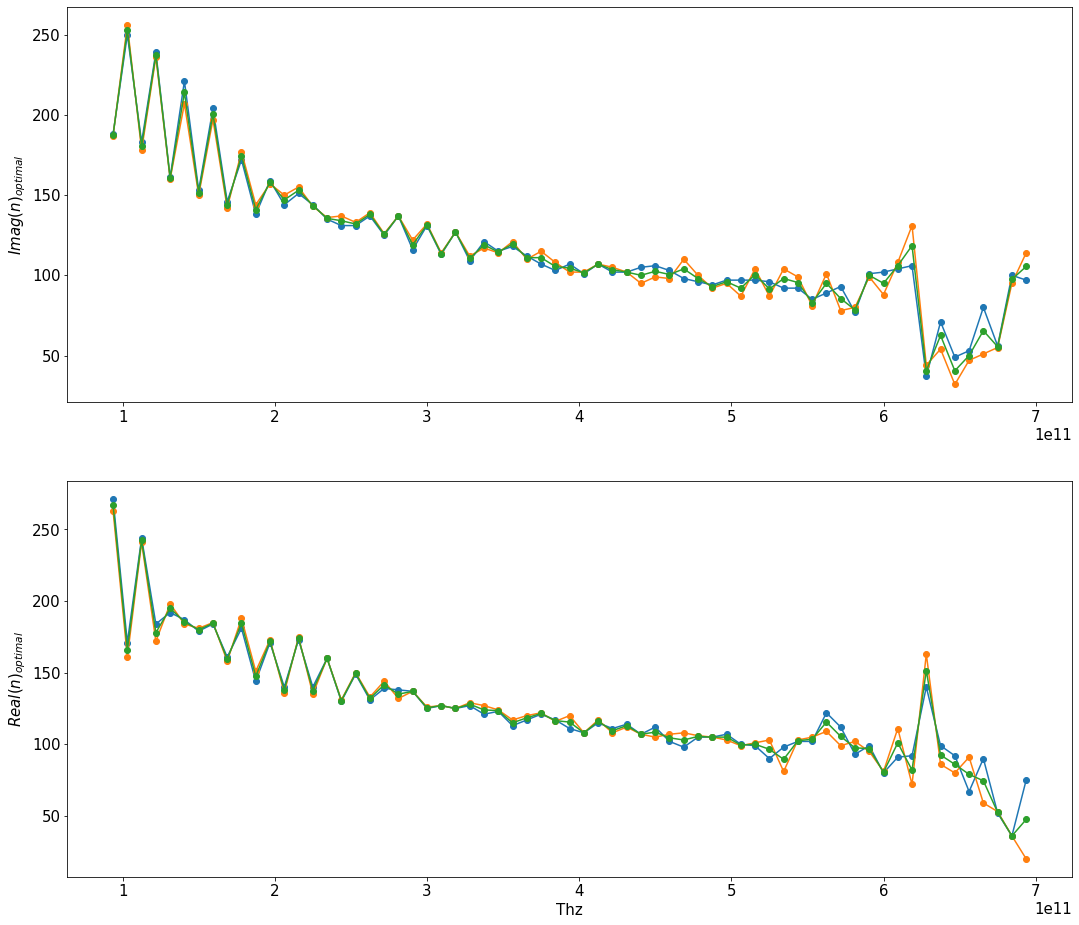

In [76]:
k_sub = (k_opt2 + k_opt1)/2
n_sub = (n_opt2 + n_opt1)/2

shift=0
fig,a=plt.subplots(2)
a[0].plot(frequency[border_start+shift:logic_stop], k_opt1[border_start+shift:logic_stop], 'o-', label='1')
a[0].plot(frequency[border_start+shift:logic_stop], k_opt2[border_start+shift:logic_stop],'o-', label='2')
a[0].plot(frequency[border_start+shift:logic_stop], k_sub[border_start+shift:logic_stop],'o-', label='avergae')
a[0].set_ylabel('$Imag(n)_{optimal}$')
a[1].plot(frequency[border_start+shift:logic_stop], n_opt1[border_start+shift:logic_stop], 'o-', label='1')
a[1].plot(frequency[border_start+shift:logic_stop], n_opt2[border_start+shift:logic_stop],'o-', label='2')
a[1].plot(frequency[border_start+shift:logic_stop], n_sub[border_start+shift:logic_stop],'o-', label='average')
a[1].set_ylabel('$Real(n)_{optimal}$')
a[1].set_xlabel('Thz')
plt.show()

In [77]:
data = np.zeros((border_stop,3))
for i in range (0,2):
    for j in range (0,logic_stop):
        data[j,0] = frequency[j]
        data[j,1] = k_sub[j]
        data[j,2] = n_sub[j]
np.savetxt('refraction_sample2_correct',data, delimiter='   ')

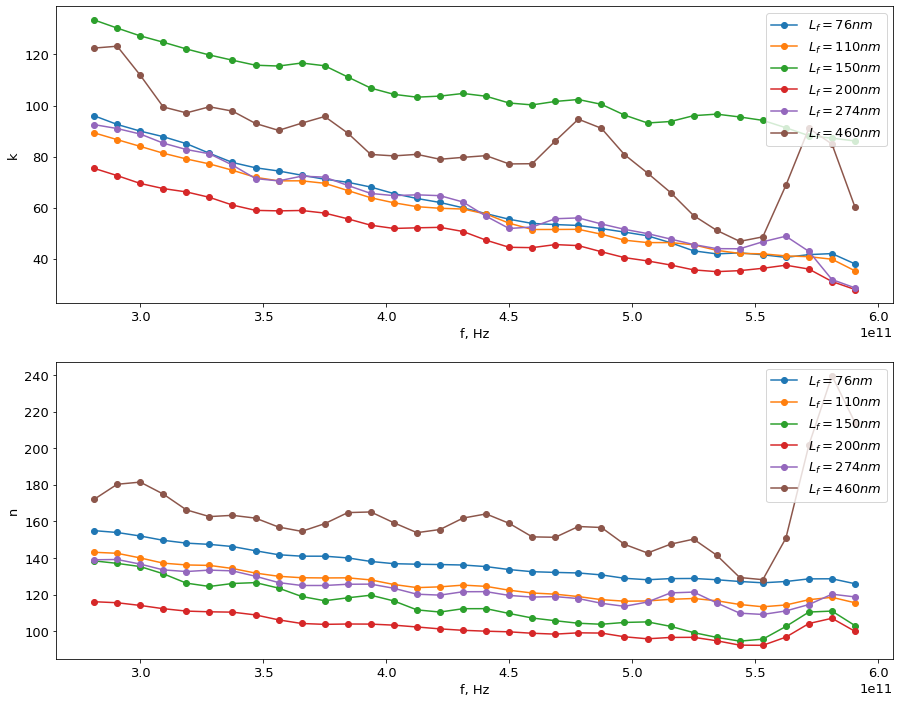

In [14]:
#ACCUMULATING DATA
from scipy.signal import butter
from scipy.signal import sosfilt
import pandas as pd


def read_and_filter(f_name):
    handle = open(f_name, "r")
    data = []
    for line in handle:
        data.append([float(x) for x in line.split()])
    handle.close()
    N=len(data)
    k_sub=[]; n_sub=[]
    for i in range (0,logic_stop):
        k_sub.append(data[i][1])
        n_sub.append(data[i][2])
    sos = butter(4, int(Long/4), 'lp', fs=Long, output='sos')
    k_sub = sosfilt(sos, k_sub)
    n_sub = sosfilt(sos, n_sub)
    return k_sub, n_sub

logic_stop = border_stop

k_2,n_2 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample2_correct')
k_3,n_3 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample3_correct')
k_4,n_4 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample4_correct')
k_5,n_5 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample5_correct')
k_6,n_6 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample6_correct')
k_7,n_7 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample7_correct')
"""
k_2,n_2 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample2_1024')
k_3,n_3 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample3_1024')
k_4,n_4 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample4_1024')
k_5,n_5 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample5_1024')
k_6,n_6 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample6_1024')
k_7,n_7 = read_and_filter('/home/meriff/Python_projects/ITO_measurment/refraction_sample7_1024')
"""
plt.rcParams['figure.figsize'] = [15,12]

shift=0
fig,a=plt.subplots(2)
plt.rc('font', size=13)          # controls default text sizes
a[0].plot(frequency[border_start+shift:logic_stop], k_7[border_start+shift:logic_stop],'o-', label='$L_f = 76nm$')
a[0].plot(frequency[border_start+shift:logic_stop], k_3[border_start+shift:logic_stop],'o-', label='$L_f = 110nm$')
a[0].plot(frequency[border_start+shift:logic_stop], k_2[border_start+shift:logic_stop],'o-', label='$L_f = 150nm$')
a[0].plot(frequency[border_start+shift:logic_stop], k_4[border_start+shift:logic_stop],'o-', label='$L_f = 200nm$')
a[0].plot(frequency[border_start+shift:logic_stop], k_5[border_start+shift:logic_stop],'o-', label='$L_f = 274nm$')
a[0].plot(frequency[border_start+shift:logic_stop], k_6[border_start+shift:logic_stop],'o-', label='$L_f = 460nm$')

a[0].legend(loc='upper right')
a[0].set_xlabel('f, Hz')
a[0].set_ylabel('k')
a[1].plot(frequency[border_start+shift:logic_stop], n_7[border_start+shift:logic_stop],'o-', label='$L_f = 76nm$')
a[1].plot(frequency[border_start+shift:logic_stop], n_3[border_start+shift:logic_stop],'o-', label='$L_f = 110nm$')
a[1].plot(frequency[border_start+shift:logic_stop], n_2[border_start+shift:logic_stop],'o-', label='$L_f = 150nm$')
a[1].plot(frequency[border_start+shift:logic_stop], n_4[border_start+shift:logic_stop],'o-', label='$L_f = 200nm$')
a[1].plot(frequency[border_start+shift:logic_stop], n_5[border_start+shift:logic_stop],'o-', label='$L_f = 274nm$')
a[1].plot(frequency[border_start+shift:logic_stop], n_6[border_start+shift:logic_stop],'o-', label='$L_f = 460nm$')
a[1].legend(loc='upper right')
a[1].set_xlabel('f, Hz')
a[1].set_ylabel('n')
plt.show()


In [122]:
container = np.zeros((6,logic_stop,3))
for i in range (0,6):
    container[i,:,0] = frequency[0:logic_stop]
container[0,:,1] = k_2[0:logic_stop]
container[0,:,2] = n_2[0:logic_stop]
container[1,:,1] = k_3[0:logic_stop]
container[1,:,2] = n_3[0:logic_stop]
container[2,:,1] = k_4[0:logic_stop]
container[2,:,2] = n_4[0:logic_stop]
container[3,:,1] = k_5[0:logic_stop]
container[3,:,2] = n_5[0:logic_stop]
container[4,:,1] = k_6[0:logic_stop]
container[4,:,2] = n_6[0:logic_stop]
container[5,:,1] = k_7[0:logic_stop]
container[5,:,2] = n_7[0:logic_stop]

df = pd.DataFrame(container[0,:,:])
writer = pd.ExcelWriter('Sample2_150nm_filtered.xlsx')
df.to_excel(writer, 'sheet1')
writer.save()

df = pd.DataFrame(container[1,:,:])
writer = pd.ExcelWriter('Sample3_110nm_filtered.xlsx')
df.to_excel(writer, 'sheet1')
writer.save()

df = pd.DataFrame(container[2,:,:])
writer = pd.ExcelWriter('Sample4_200nm_filtered.xlsx')
df.to_excel(writer, 'sheet1')
writer.save()

df = pd.DataFrame(container[3,:,:])
writer = pd.ExcelWriter('Sample5_274nm_filtered.xlsx')
df.to_excel(writer, 'sheet1')
writer.save()

df = pd.DataFrame(container[4,:,:])
writer = pd.ExcelWriter('Sample6_460nm_filtered.xlsx')
df.to_excel(writer, 'sheet1')
writer.save()

df = pd.DataFrame(container[5,:,:])
writer = pd.ExcelWriter('Sample7_76nm_filtered.xlsx')
df.to_excel(writer, 'sheet1')
writer.save()